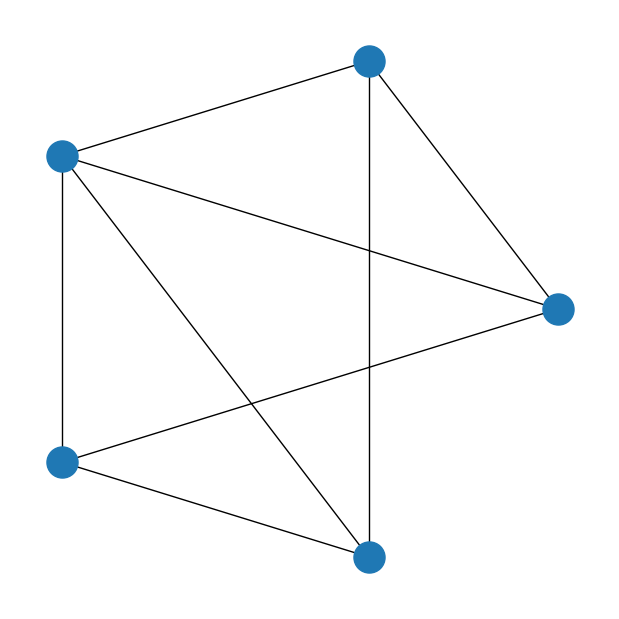

In [1]:
import numpy as np
import torch.multiprocessing as mp
from src.viz import *
from src.sbm import generate_sbm, MySbmFromScratch
from src.utils import get_adjancy, random_permute_adj, convert_to_ranks
from networkx.algorithms.community import modularity
import networkx as nx
import random
import torch
from itertools import permutations
import matplotlib.pyplot as plt
from concurrent.futures import ThreadPoolExecutor
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import euclidean_distances
from src.mixturemodel import MixtureModel

matrix = np.array([[0,1,1,1,0],
                  [1,0,1,0,1],
                  [1,1,0,1,1],
                  [1,0,1,0,1],
                  [0,1,1,1,0]])

simple_graph_from_adj(matrix, labels=False)

In [2]:
graph = nx.read_gml("../data/sp_school_day_2.gml")
adj_matrix = nx.to_numpy_array(graph)

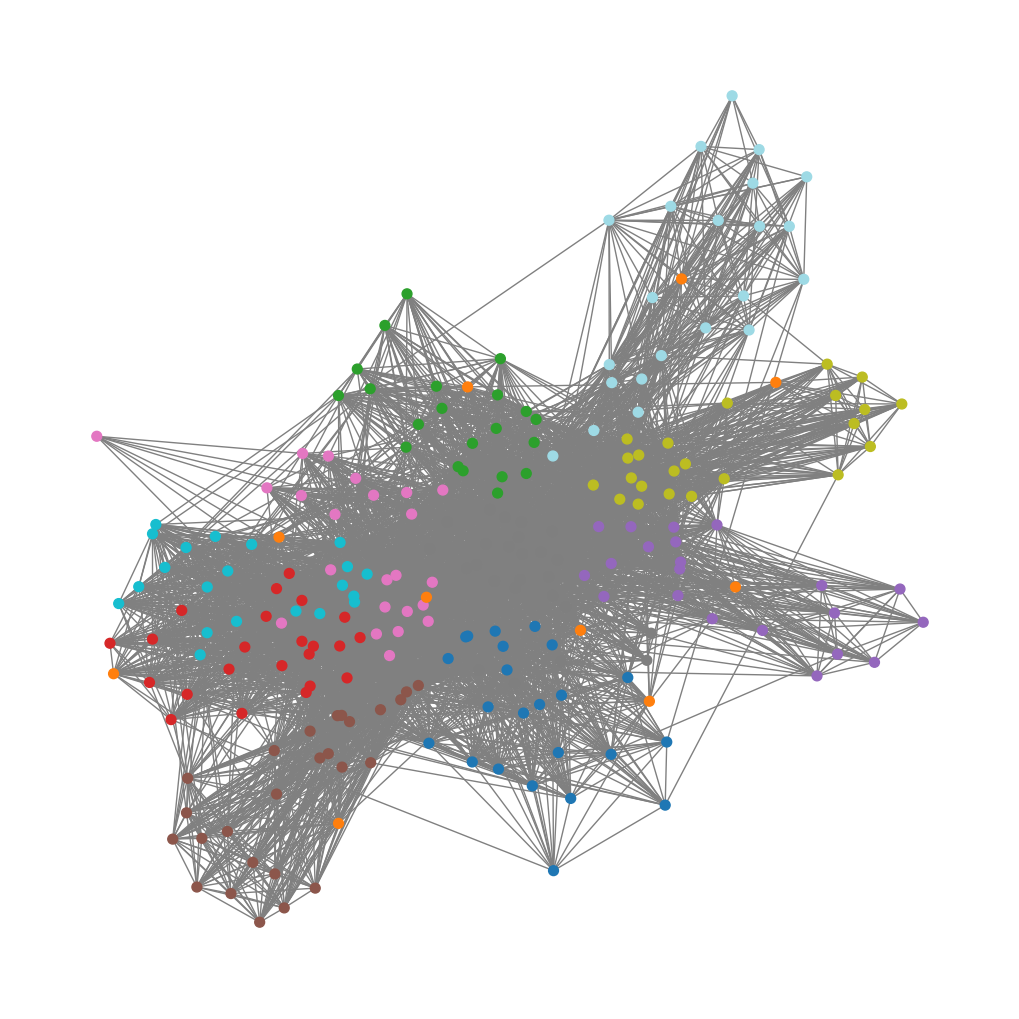

In [3]:
plot_class_graph(graph, "gt")

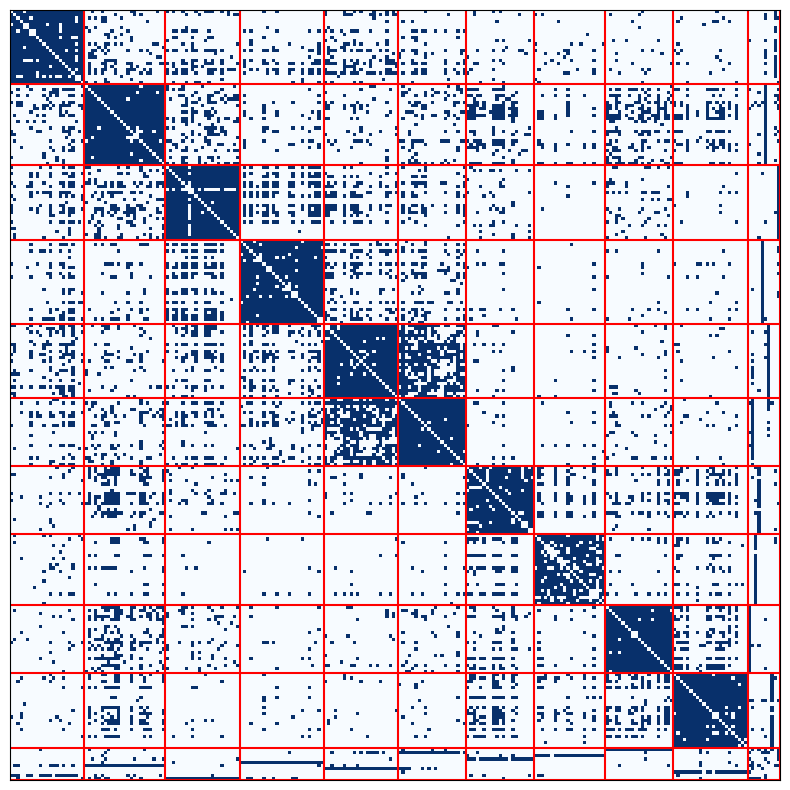

In [4]:
plot_adjacency_matrix_by_class(graph, "gt")

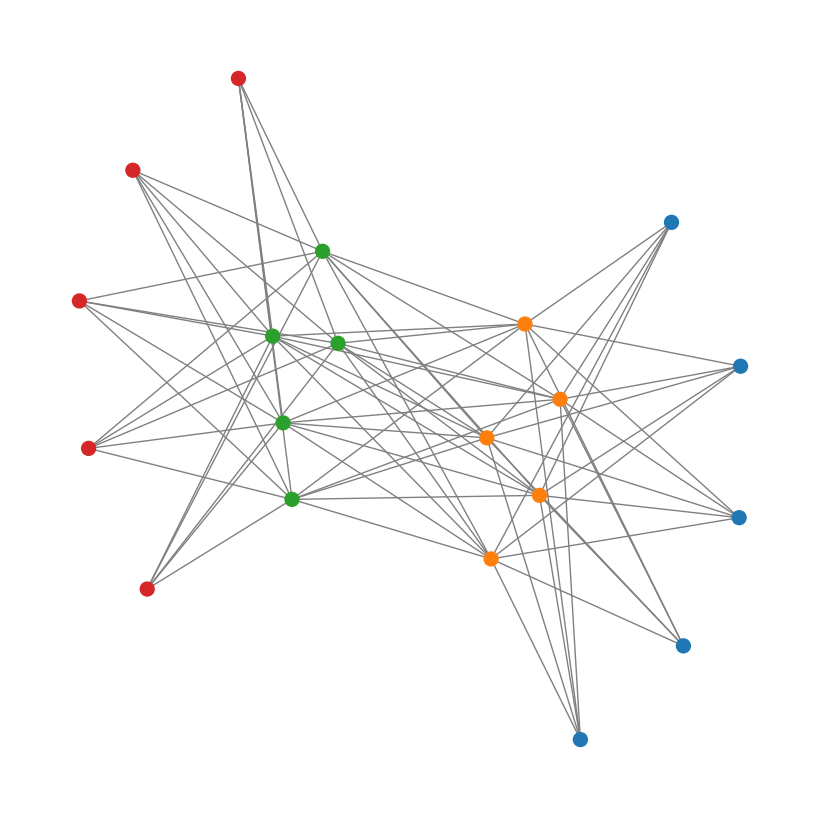

In [25]:
n_classes = [5, 5, 5, 5]

probs = np.array([
    [0, 1, 0, 0],
    [1, 0, 1, 0],
    [0, 1, 0, 1],
    [0, 0, 1, 0]
])

G = generate_sbm(n_classes, probs)

plot_sbm(G, n_classes)


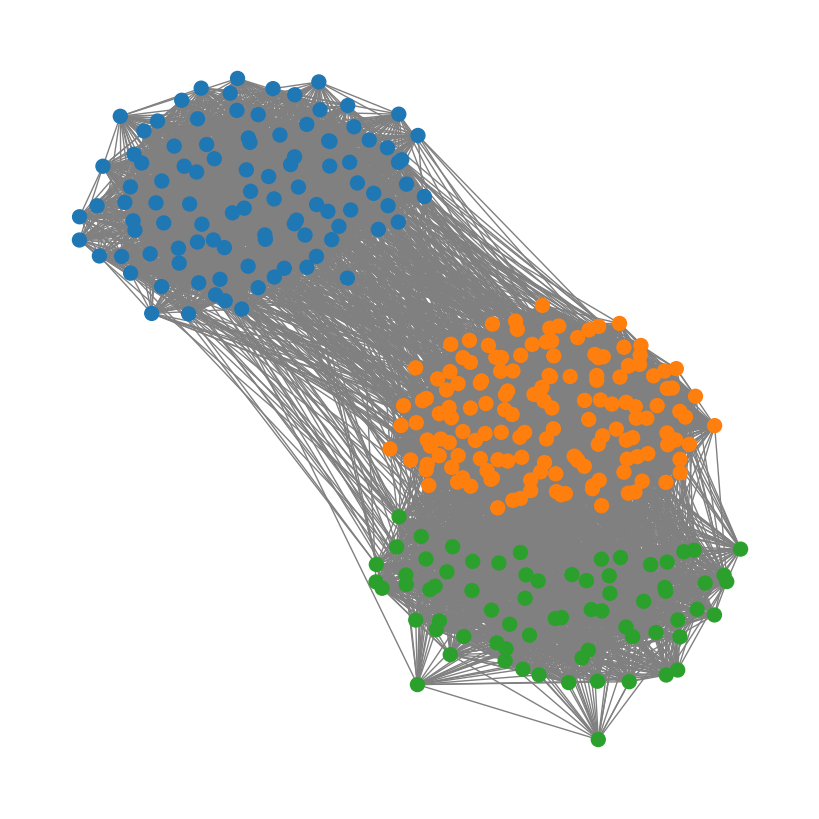

In [11]:
sbm = MySbmFromScratch()

sbm.generate_graph(n_classes = n_classes, probs = probs)
sbm.plot_graph()


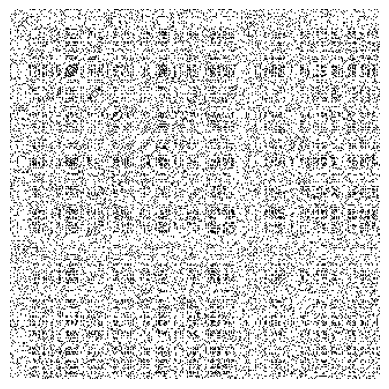

In [12]:
_ = random_permute_adj(sbm.adj) # Plus visuel pour voir si un algo a bien performer
# Ie on voit bien que la avec des indices aléatoires la matrice d'agence ne ressemble a rien..

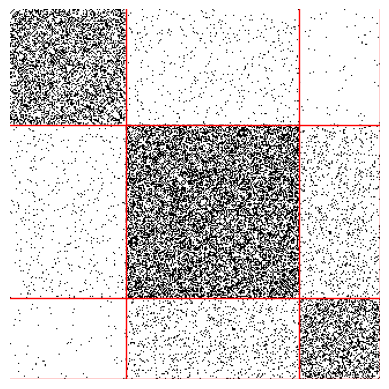

In [13]:
sbm.plot_adj()

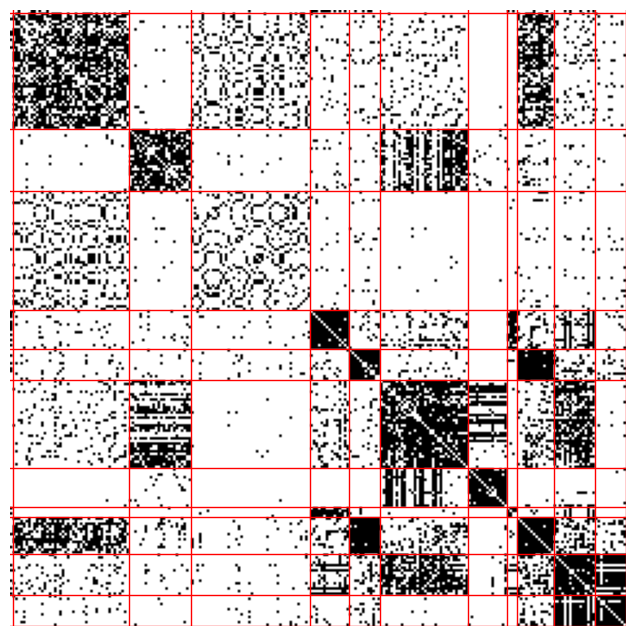

In [5]:
mp.set_start_method('spawn', force=True)

test = MixtureModel(adj_matrix, adj_matrix.shape[0], 12, device='cuda') # K = 12
res = test.em_parallelised_2( return_params=True, init="", max_it=100, tolerance=1e-4, num_inits=20)
test.plot_preds_adjancy(res["tau"])


In [6]:
from src.metrics import comp_relative_modularity

comp_relative_modularity(graph, res["tau"])

0.6967375262754815

/home/onyxia/work/PGM_MVA/src/mixturemodel.py:156: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(tau, dtype=torch.float).to(self.device)


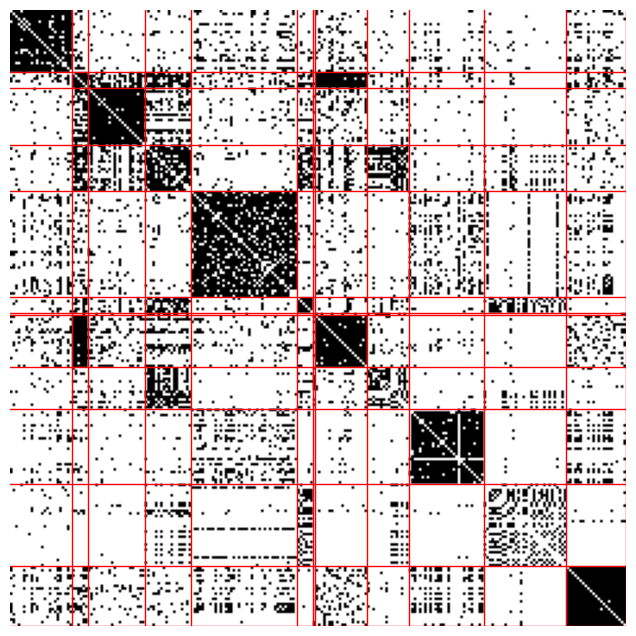

In [7]:
tau = test._init_K_means().cpu()
test.plot_preds_adjancy(tau)

In [9]:
comp_relative_modularity(graph, tau)

0.9228386550779195

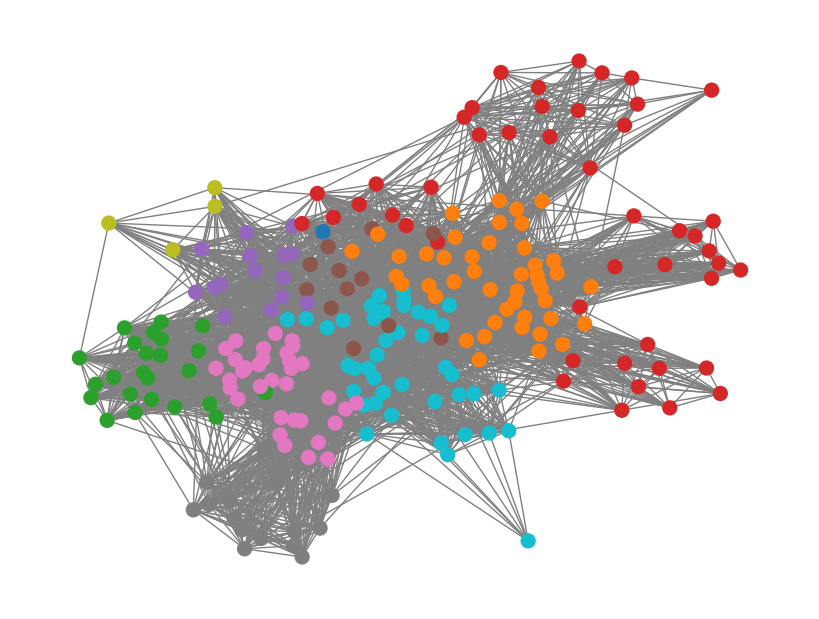

In [10]:
test.plot_from_tau(determinist=False)

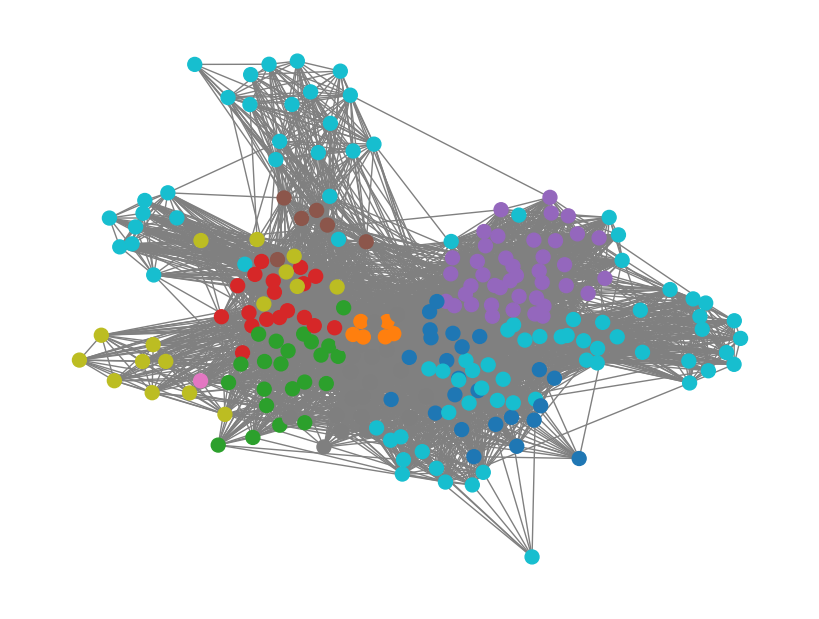

In [14]:
test.tau = tau
test.plot_from_tau(determinist=False)